Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, t


Load dataset:

In [2]:

# CSV-Datei einlesen
df = pd.read_csv("../0_DataPreparation/merged_data_full_with_weekdays.csv")

df.head()


,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Feiertag,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag
0,2013-07-01,1,148.828353,0.0,6.0,17.8375,15.0,20.0,0.0,1,0,0,0,0,0,0
1,2013-07-02,1,159.793757,0.0,3.0,17.3125,10.0,20.0,0.0,0,1,0,0,0,0,0
2,2013-07-03,1,111.885594,0.0,7.0,21.0750,6.0,61.0,0.0,0,0,1,0,0,0,0
3,2013-07-04,1,168.864941,0.0,7.0,18.8500,7.0,20.0,0.0,0,0,0,1,0,0,0
4,2013-07-05,1,171.280754,0.0,5.0,19.9750,12.0,20.0,0.0,0,0,0,0,1,0,0


Daten vorbereiten

In [6]:
# Neue Spalte "Wochentag" erstellen
df["Wochentag"] = pd.Categorical(
    np.where(df["Montag"] == 1, "Montag",
    np.where(df["Dienstag"] == 1, "Dienstag",
    np.where(df["Mittwoch"] == 1, "Mittwoch",
    np.where(df["Donnerstag"] == 1, "Donnerstag",
    np.where(df["Freitag"] == 1, "Freitag",
    np.where(df["Samstag"] == 1, "Samstag", "Sonntag"))))))
)

# Sortierreihenfolge für Wochentage festlegen
df["Wochentag"] = df["Wochentag"].cat.set_categories(
    ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"],
    ordered=True
)

Durchschnitt und Konfidenzintervall berechnen

In [14]:
# Gruppieren nach Wochentagen
grouped = df.groupby("Wochentag")["Umsatz"]

# Mittelwerte und Standardfehler berechnen
means = grouped.mean()
std_errors = grouped.apply(sem)  # Standardfehler

# Konfidenzintervall berechnen
confidence_intervals = std_errors * t.ppf((1 + 0.95) / 2, grouped.count() - 1)
confidence_intervals = confidence_intervals.reindex(means.index)  # Reihenfolge sicherstellen

confidence_intervals = confidence_intervals.fillna(0) 
yerr = confidence_intervals.values

/tmp/ipykernel_21801/3645357842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("Wochentag")["Umsatz"]


Balkendiagramm erstellen

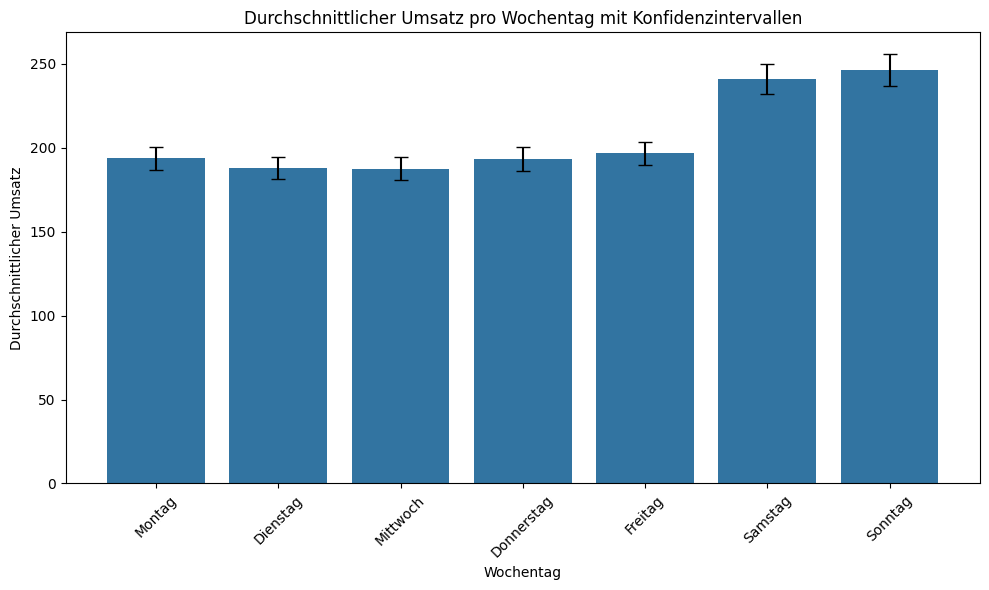

In [15]:
# Balkendiagramm mit Konfidenzintervallen
plt.figure(figsize=(10, 6))
sns.barplot(x=means.index, y=means.values, capsize=0.1)
plt.errorbar(x=range(len(means)), y=means.values, yerr=yerr, fmt='none', ecolor='black', capsize=5)
plt.title("Durchschnittlicher Umsatz pro Wochentag mit Konfidenzintervallen")
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittlicher Umsatz")
plt.xticks(ticks=range(len(means)), labels=means.index, rotation=45)
plt.tight_layout()
plt.show()
